# Market Baseket Analysis

In [64]:
# yang di import

import pandas as pd


## Ambil Data

In [65]:
df1 = pd.read_csv('semua_transaksi_ch11b.csv', parse_dates=['TRX_TS'], index_col=['TRX_ID'])


In [66]:
df1.head()

,TRX_TS,PRODUCT_ID,PRODUCT_NAME,SALES
TRX_ID,,,,
85,05/31/17 21.14,263,Cappuccino,34000
85,05/31/17 21.14,227,Kopi Tubruk,44000
85,05/31/17 21.14,268,Macchiato,26000
85,05/31/17 21.14,268,Macchiato,26000
85,05/31/17 21.14,268,Macchiato,26000


In [67]:
df1.index

Int64Index([  85,   85,   85,   85,   85,   85,   85,   85,   86,   86,
            ...
            8848, 8848, 8849, 8849, 8850, 8850, 8851, 8851, 8852, 8852],
           dtype='int64', name='TRX_ID', length=30503)

# Data Profiling

In [68]:
df1['PRODUCT_NAME'].value_counts().sort_values(ascending=False)

Teh Tubruk                     4677
Mineral Water                  2736
Pisang Goreng                  2206
Nasi Putih                     2016
Nasi Goreng Jawa               1810
Kopi Tubruk                    1799
Soto Ayam                      1758
Extra Kerupuk Putih            1567
Rawon                          1441
Bakmi Godog Keju               1415
Bakmi Goreng Jawa              1184
Fresh Orange Juice             1163
Latte                          1077
Teh Tarik                       957
Roti Bakar                      854
Cappuccino                      811
Macchiato                       634
Hot/Ice Lemon Tea               599
Americano                       506
French Fries                    486
Spaghetti Bolognese             303
Espresso                        111
Macchiato                       100
Iced Tea                         87
Milo Dinosaur                    43
Bakwan Goreng                    32
Double Espresso                  22
Hot Chocolate               

In [69]:
df2 = df1.drop(['PRODUCT_ID'], axis=1).groupby('PRODUCT_NAME').sum()

<AxesSubplot:xlabel='PRODUCT_NAME'>

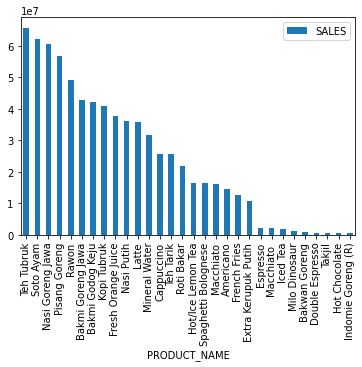

In [70]:
df2.sort_values(by=['SALES'], ascending=False).head(30).plot(kind='bar')

## Transformasi Data

In [71]:
df1HotEncoded = df1.pivot_table(index='TRX_ID', columns='PRODUCT_NAME', values='SALES')

In [72]:
df1HotEncoded.head()

PRODUCT_NAME,Americano,Bakmi Godog Keju,Bakmi Goreng Jawa,Bakwan Goreng,Cappuccino,Double Espresso,Es Batu,Es Teh Susu (Gula Jawa),Espresso,Extra Kerupuk Putih,...,Pisang Goreng,Pisang Goreng Tuna Sandwich,Rawon,Roti Bakar,Soto Ayam,Spaghetti Bolognese,Takjil,Teh Tarik,Teh Tubruk,Telur Orak Arik
TRX_ID,,,,,,,,,,,,,,,,,,,,,
85,NaN,NaN,NaN,NaN,34000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,36000.0,NaN,48000.0,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,48000.0,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,48000.0,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,34000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,22000.0,NaN,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000.0,...,NaN,NaN,NaN,NaN,35000.0,NaN,NaN,NaN,NaN,NaN


In [73]:
df1HotEncoded.shape
# .shape tambah tanda () jika di gunakan akan error

# print(len(df1HotEncoded))

(8144, 40)

In [74]:
df1HotEncoded = df1.pivot_table(index='TRX_ID', columns='PRODUCT_NAME', values='SALES').fillna(0)

In [75]:
df1HotEncoded[df1HotEncoded > 0 ] = 1

In [76]:
df1HotEncoded.head()

PRODUCT_NAME,Americano,Bakmi Godog Keju,Bakmi Goreng Jawa,Bakwan Goreng,Cappuccino,Double Espresso,Es Batu,Es Teh Susu (Gula Jawa),Espresso,Extra Kerupuk Putih,...,Pisang Goreng,Pisang Goreng Tuna Sandwich,Rawon,Roti Bakar,Soto Ayam,Spaghetti Bolognese,Takjil,Teh Tarik,Teh Tubruk,Telur Orak Arik
TRX_ID,,,,,,,,,,,,,,,,,,,,,
85,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Spare Matrix

`Space Matrix`, yaitu matrix yang isinya "tidak penuh".

In [80]:
# dfSparse =  df1HotEncoded.astype()
# dfSparse =  df1HotEncoded.to_dense()
# dfSparse =  df1HotEncoded.SparseDataFrame()
# dfSparse =  df1HotEncoded.to_sparse(fill_value=None, kind='lock')
# df1HotEncoded.density()
# ts = pd.Series(pd.arrays.SparseArray(df1HotEncoded))
# f1HotEncoded.format(sdf.memory_usage().sum() / 1e3)